<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/food_delivery_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (18000, 5)
   distance_km  traffic_level  restaurant_rating  time_of_day  \
0         5.93              2                4.8            0   
1        14.29              2                4.9            1   
2        11.11              2                3.0            1   
3         9.18              2                3.6            0   
4         2.76              3                4.7            0   

   delivery_time_minutes  
0                   29.9  
1                   60.0  
2                   56.4  
3                   42.5  
4                   19.5  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   distance_km            18000 non-null  float64
 1   traffic_level          18000 non-null  int64  
 2   restaurant_rating      18000 non-null  float64
 3   time_of_day            18000 non-

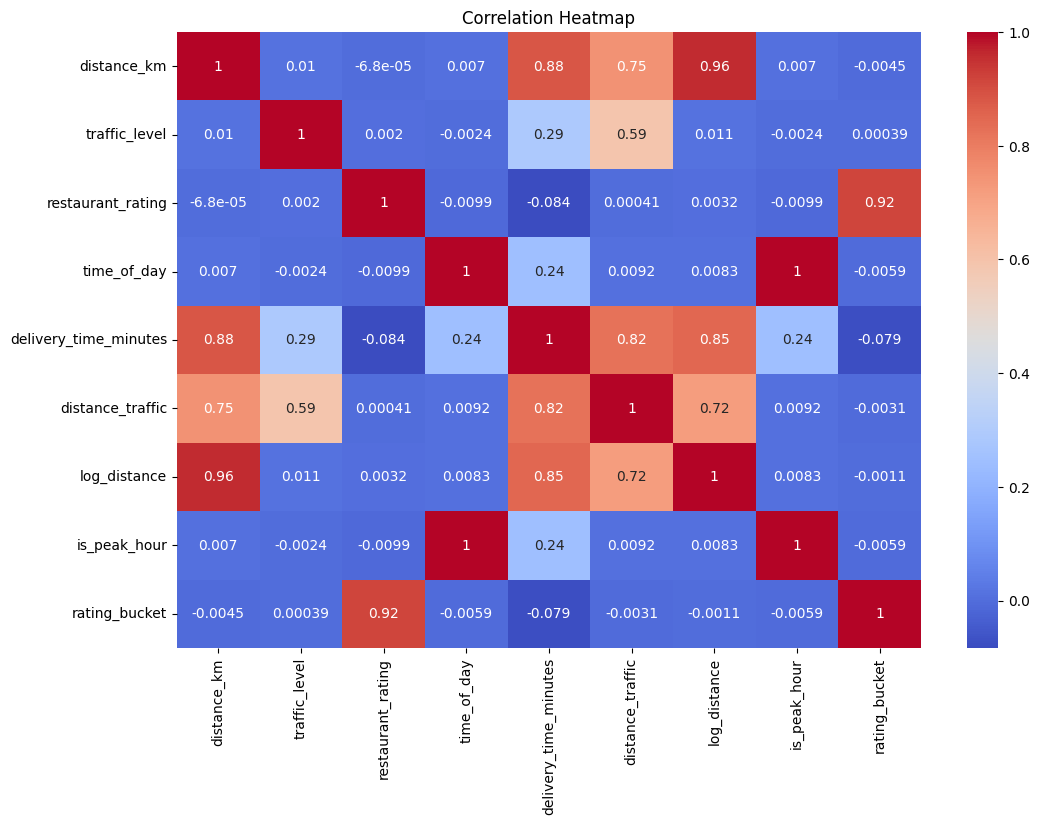


Linear Regression Performance
------------------------------
MAE : 3.2316400911590306
MSE : 16.578027384617336
RMSE: 4.0716123814304
R2  : 0.9180224438655948

Decision Tree Performance
------------------------------
MAE : 4.591435185185184
MSE : 33.168852932098766
RMSE: 5.759240655858962
R2  : 0.8359816014251494

Random Forest Performance
------------------------------
MAE : 3.6661677148168184
MSE : 20.99284726648298
RMSE: 4.5817952012811505
R2  : 0.8961913697400479


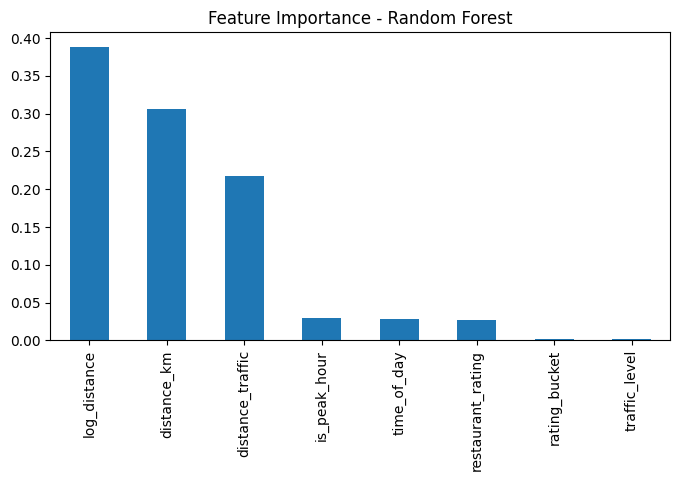


🚀 Predicted Delivery Time (minutes): 45.7

✅ PROJECT COMPLETED WITH FEATURE ENGINEERING

• Problem Type      : Regression
• Feature Engineering : ✔ Applied
• Best Model        : Random Forest
• Metrics Used      : MAE, RMSE, R2
• Real-World Ready  : YES



In [1]:
# ============================================================
# 📦 FOOD DELIVERY TIME PREDICTION – COMPLETE ML PROJECT
#      (WITH FEATURE ENGINEERING)
# ============================================================

# =============================
# 1️⃣ IMPORT LIBRARIES
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =============================
# 2️⃣ LOAD DATASET
# =============================
df = pd.read_csv('/content/food_delivery_time.csv')

print("Dataset Shape:", df.shape)
print(df.head())

# =============================
# 3️⃣ DATA UNDERSTANDING
# =============================
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())

# =============================
# 4️⃣ CHECK MISSING VALUES
# =============================
print("\nMissing Values:")
print(df.isnull().sum())

# =============================
# 5️⃣ FEATURE ENGINEERING
# =============================

# 🔹 1. Interaction Feature: Distance × Traffic
df['distance_traffic'] = df['distance_km'] * df['traffic_level']

# 🔹 2. Log Transformation (handles skewness)
df['log_distance'] = np.log1p(df['distance_km'])

# 🔹 3. Peak Hour Feature (binary)
# time_of_day: 0 = Morning, 1 = Afternoon, 2 = Evening, 3 = Night
df['is_peak_hour'] = df['time_of_day'].apply(lambda x: 1 if x in [1, 2] else 0)

# 🔹 4. Restaurant Rating Bucket
def rating_bucket(rating):
    if rating >= 4.5:
        return 2   # High
    elif rating >= 3.5:
        return 1   # Medium
    else:
        return 0   # Low

df['rating_bucket'] = df['restaurant_rating'].apply(rating_bucket)

print("\nFeature Engineered Columns Added:")
print(df.head())

# =============================
# 6️⃣ EXPLORATORY DATA ANALYSIS
# =============================
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# =============================
# 7️⃣ FEATURE SELECTION
# =============================
X = df.drop('delivery_time_minutes', axis=1)
y = df['delivery_time_minutes']

# =============================
# 8️⃣ TRAIN TEST SPLIT
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================
# 9️⃣ FEATURE SCALING
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# 🔟 MODEL TRAINING
# =============================

# 🔹 Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# 🔹 Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# 🔹 Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# =============================
# 1️⃣1️⃣ MODEL EVALUATION
# =============================
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance")
    print("-" * 30)
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# =============================
# 1️⃣2️⃣ FEATURE IMPORTANCE
# =============================
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()

# =============================
# 1️⃣3️⃣ PREDICTION ON NEW DATA
# =============================
new_order = pd.DataFrame({
    'distance_km': [7.5],
    'traffic_level': [2],
    'restaurant_rating': [4.5],
    'time_of_day': [1]
})

# Apply SAME feature engineering
new_order['distance_traffic'] = new_order['distance_km'] * new_order['traffic_level']
new_order['log_distance'] = np.log1p(new_order['distance_km'])
new_order['is_peak_hour'] = 1
new_order['rating_bucket'] = 2

predicted_time = rf.predict(new_order)

print("\n🚀 Predicted Delivery Time (minutes):", round(predicted_time[0], 2))

# =============================
# 1️⃣4️⃣ CONCLUSION
# =============================
print("""
✅ PROJECT COMPLETED WITH FEATURE ENGINEERING

• Problem Type      : Regression
• Feature Engineering : ✔ Applied
• Best Model        : Random Forest
• Metrics Used      : MAE, RMSE, R2
• Real-World Ready  : YES
""")
